<a href="https://colab.research.google.com/github/killisai-ram/sms-spam-classifier/blob/main/sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project classifies SMS messages as spam or ham using machine learning. It involves importing necessary libraries, loading and preprocessing data, vectorizing text, training a Naive Bayes model, and evaluating its performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
#This code allows users to upload files directly into the Google Colab environment for processing. The files.upload() method opens a file dialog to select and upload files.
from google.colab import files
files.upload()

Saving spam.csv to spam.csv


{'spam.csv': b'v1,v2,,,\r\nham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,\r\nham,Ok lar... Joking wif u oni...,,,\r\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s,,,\r\nham,U dun say so early hor... U c already then say...,,,\r\nham,"Nah I don\'t think he goes to usf, he lives around here though",,,\r\nspam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, \xe5\xa31.50 to rcv",,,\r\nham,Even my brother is not like to speak with me. They treat me like aids patent.,,,\r\nham,As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,\r\nspam,WINNER!! As a valued network customer you have been selected to rece

In [3]:
!ls

sample_data  spam.csv


This line of code reads the dataset file spam.csv into a pandas DataFrame. It uses the latin-1 encoding to handle any special characters or symbols in the CSV file that might not be compatible with the default encoding.



In [4]:
#This line of code reads the dataset file spam.csv into a pandas DataFrame.
# It uses the latin-1 encoding to handle any special characters or symbols in the CSV file that might not be compatible with the default encoding.

data = pd.read_csv('spam.csv', encoding='latin-1')


In [5]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
# Drop unnecessary columns

data = data[['v1', 'v2']]

In [7]:
data


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Rename the columns

data.columns = ['label', 'message']


In [10]:
# Verify the new column names

print(data.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [11]:
# This line of code displays information about the dataset, such as the number of rows, columns, and data types for each column.
# It helps in understanding the structure of the dataset and identifying any missing or incorrect data.

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [12]:
# This line of code prints the first 5 rows of the dataset, giving a quick preview of the data.
# It allows users to inspect the first few entries and understand the content and structure of the dataset.

print(data.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [13]:
#This line of code generates a statistical summary of the dataset, including metrics like mean, standard deviation, minimum, and maximum values for numerical columns.
# It provides insights into the distribution of the numerical data.

print(data.describe())

       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


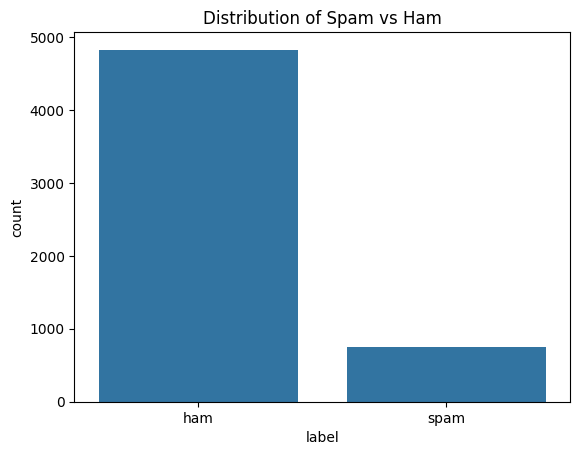

In [14]:
# This line of code shows the distribution of spam and ham messages in the dataset.
# The value_counts(normalize=True) function calculates the proportion of each category, while the countplot visualizes the distribution of the 'label' column (spam vs. ham).
# The plot provides a clear view of the class imbalance or balance in the dataset.

print(data['label'].value_counts(normalize=True))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam vs Ham')
plt.show()

In [15]:
# This line of code checks for any missing or null values in the dataset.
# The isnull().sum() function returns the total number of null values for each column, helping identify if any columns need cleaning before further analysis or model training.

print(data.isnull().sum())

label      0
message    0
dtype: int64


In [16]:
# This line of code maps the categorical labels ('ham' and 'spam') to numerical values. The label 'ham' is mapped to 0, and 'spam' is mapped to 1.
# This transformation is necessary because most machine learning algorithms require numerical values as inputs.

data['label'] = data['label'].map({'ham': 0, 'spam': 1})

<ipython-input-16-a5b234344102>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(text)

data['cleaned_message'] = data['message'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [18]:
import nltk

# Download the stopwords
nltk.download('stopwords')
nltk.download('wordnet')  # Ensure the WordNet lemmatizer resource is also available

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(text)

# Apply preprocessing
data['cleaned_message'] = data['message'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-19-f10e4b243fa5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_message'] = data['message'].apply(preprocess_text)


In [20]:
data.loc[:, 'cleaned_message'] = data['message'].apply(preprocess_text)

In [21]:
data

,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u å pound prize claim ...
5568,0,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(text)

# Apply preprocessing and avoid the warning
data.loc[:, 'cleaned_message'] = data['message'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
print(data.head())


   label                                            message  \
0      0  Go until jurong point, crazy.. Available only ...   
1      0                      Ok lar... Joking wif u oni...   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...   
3      0  U dun say so early hor... U c already then say...   
4      0  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  


In [24]:
# Vectorization: Converts text messages into numerical features using TfidfVectorizer.
# X: Contains the features (top 3000 words from cleaned messages).
# y: Contains the labels (0 for ham, 1 for spam).

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(data['cleaned_message']).toarray()
y = data['label']

In [25]:
# X_train, X_test: Features for training and testing.
# y_train, y_test: Corresponding labels for training and testing.
# test_size=0.3: 30% of the data is used for testing.
# random_state=42: Ensures the split is reproducible.
# stratify=y: Ensures the split maintains the proportion of classes (spam vs. ham).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [27]:
# model = MultinomialNB(): Creates an instance of the Multinomial Naive Bayes classifier.
# model.fit(X_train, y_train): Trains the model using the training data (X_train for features and y_train for labels).

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [28]:
y_pred = model.predict(X_test)

In [29]:
# classification_report(y_test, y_pred): Generates a detailed classification report that includes precision, recall, F1-score, and support for each class (spam and ham).
# confusion_matrix(y_test, y_pred): Outputs the confusion matrix, which shows the true positives, false positives, true negatives, and false negatives.
# accuracy_score(y_test, y_pred): Calculates the accuracy of the model on the test set, which is the percentage of correct predictions.

print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.82      0.90       224

    accuracy                           0.97      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.97      0.97      1672

Confusion Matrix:
[[1447    1]
 [  41  183]]
Accuracy Score: 0.9748803827751196


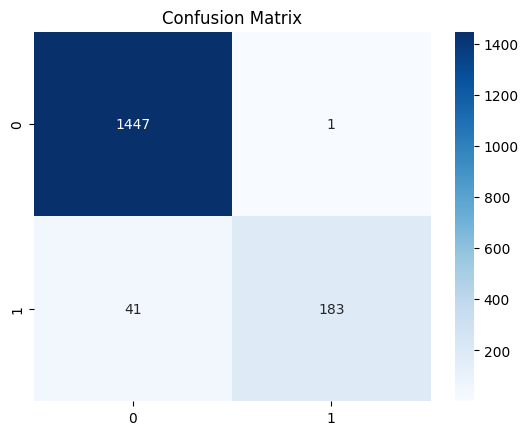

In [31]:
# sns.heatmap(): Creates a heatmap from the confusion matrix, with annotations (using annot=True) to display the number of occurrences in each cell.
# The fmt='d' ensures the numbers are displayed as integers, and cmap='Blues' applies a blue color map.
# plt.title(): Adds a title to the heatmap.
# plt.show(): Displays the heatmap.
# The resulting heatmap provides a clear visual representation of the model's performance, showing how well it distinguishes between spam and ham messages.

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Example: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       0.99      0.74      0.85       224

    accuracy                           0.96      1672
   macro avg       0.97      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672



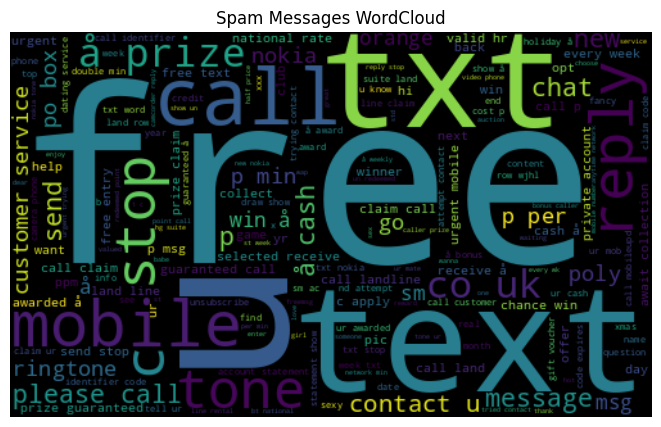

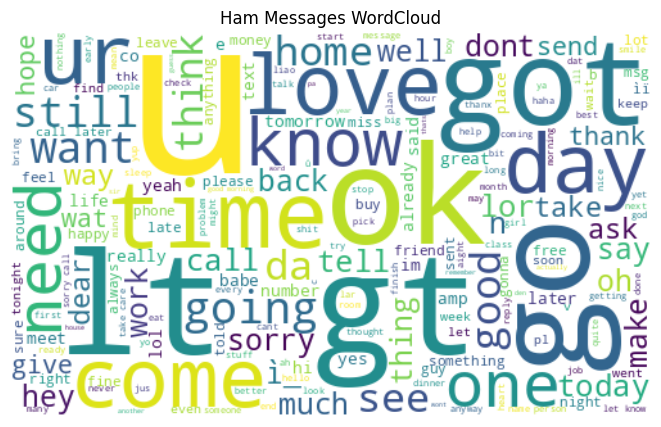

In [33]:
from wordcloud import WordCloud

spam_words = ' '.join(data[data['label'] == 1]['cleaned_message'])
ham_words = ' '.join(data[data['label'] == 0]['cleaned_message'])

spam_wc = WordCloud(width=500, height=300, background_color='black').generate(spam_words)
ham_wc = WordCloud(width=500, height=300, background_color='white').generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Messages WordCloud')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham Messages WordCloud')
plt.axis('off')
plt.show()

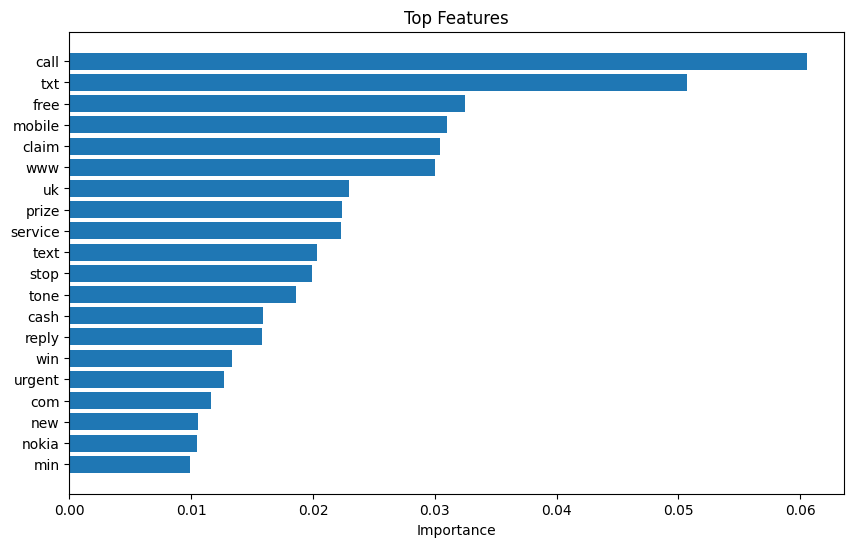

In [34]:
# Encode the 'label' column (0 = ham, 1 = spam)
y = data['label']  # Use 'label' column instead of 'category'

# Vectorize the 'cleaned_message' column
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['cleaned_message']).toarray()

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
import numpy as np
import matplotlib.pyplot as plt
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Retrieve top features
top_features = [vectorizer.get_feature_names_out()[i] for i in sorted_indices[:20]]

# Plot top features
plt.figure(figsize=(10, 6))
plt.barh(top_features, feature_importances[sorted_indices[:20]])
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Top Features')
plt.xlabel('Importance')
plt.show()

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Load Dataset
data = pd.read_csv("spam.csv", encoding='latin-1')
data.columns = ['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data = data[['label', 'message']]

# Encode 'label' (ham = 0, spam = 1)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Preprocess messages
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenize
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(text)

data['cleaned_message'] = data['message'].apply(preprocess_text)

# Vectorize cleaned messages
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['cleaned_message']).toarray()
y = data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

# Save the model and vectorizer
with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Model Accuracy: 0.97847533632287


In [37]:
%%writefile app.py
from flask import Flask, request, render_template
import pickle

# Load model and vectorizer
with open('spam_classifier.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# Create Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        message = request.form['message']
        processed_message = vectorizer.transform([message]).toarray()
        prediction = model.predict(processed_message)
        result = 'Spam' if prediction[0] == 1 else 'Ham (Normal)'
        return render_template('index.html', prediction=result)

if __name__ == '__main__':
    app.run(debug=True)



Overwriting app.py


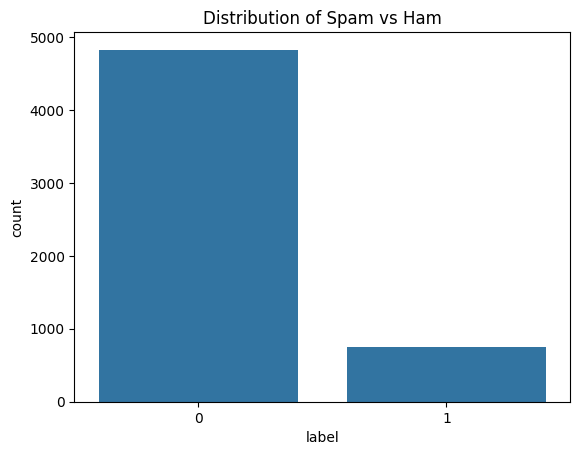

In [38]:
# A bar chart can help visualize the distribution of labels (Spam vs. Ham) in your dataset.
# How to Use: A bar plot showing the frequency of each category can give you insights into how balanced the dataset is.

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=data)
plt.title('Distribution of Spam vs Ham')
plt.show()


In [41]:
print(data.columns)

Index(['label', 'message', 'cleaned_message'], dtype='object')


In [42]:
# Example update if the column name is 'message'
spam_messages = data[data['label'] == 1]['message'].str.cat(sep=' ')
ham_messages = data[data['label'] == 0]['message'].str.cat(sep=' ')


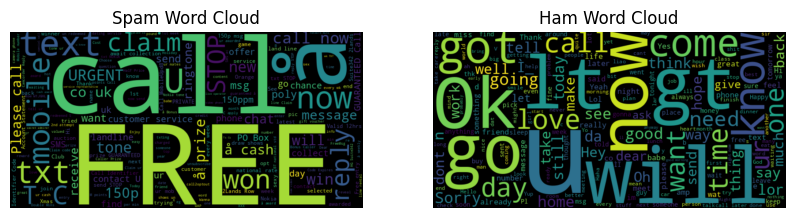

In [44]:
# Word clouds can show you which terms are most common in spam vs. ham messages. This can help identify keywords associated with spam.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all messages into one string (update column name accordingly)
spam_messages = data[data['label'] == 1]['message'].str.cat(sep=' ')  # Update 'message' to the correct column name
ham_messages = data[data['label'] == 0]['message'].str.cat(sep=' ')  # Update 'message' to the correct column name

# Generate word clouds for both spam and ham messages
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_messages)
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_messages)

# Plot the word clouds
plt.figure(figsize=(10, 5))

# Spam word cloud
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

# Ham word cloud
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()


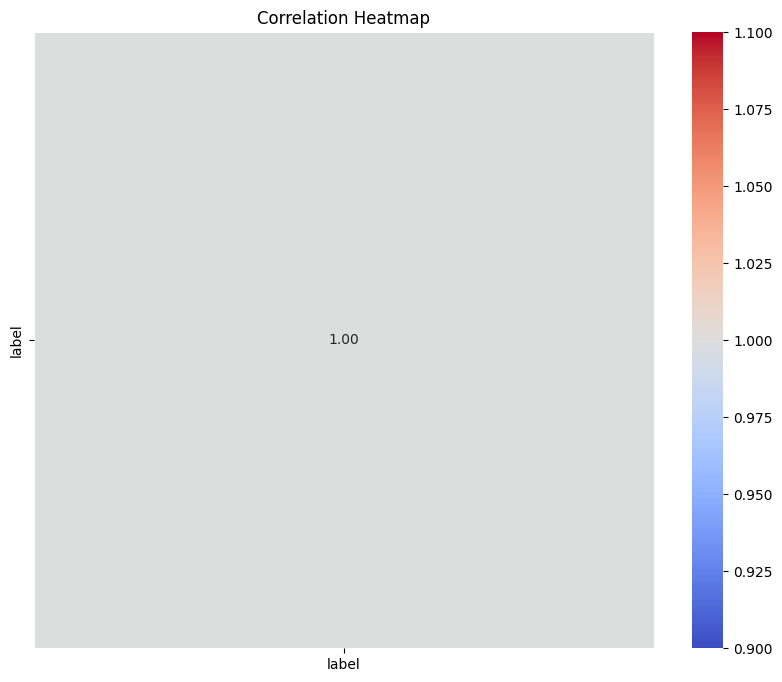

In [46]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


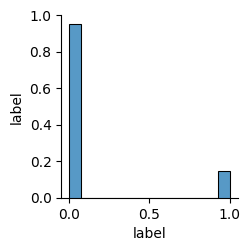

In [47]:
sns.pairplot(data)
plt.show()


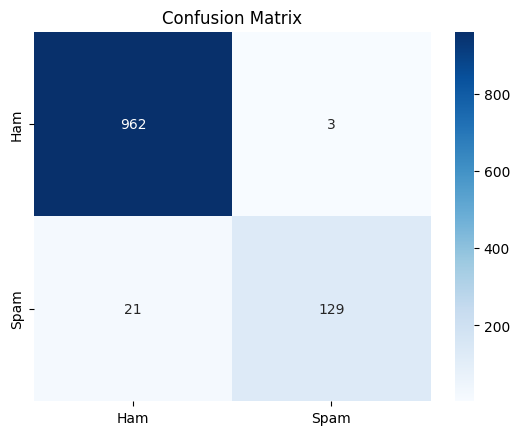

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.show()


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Ensure the target variable is mapped correctly
y = data['label']  # Target variable
X = data['cleaned_message']  # Features (cleaned messages)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the vectorizer and transform the text data
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Now you can proceed with predictions and further evaluation


LogisticRegression()

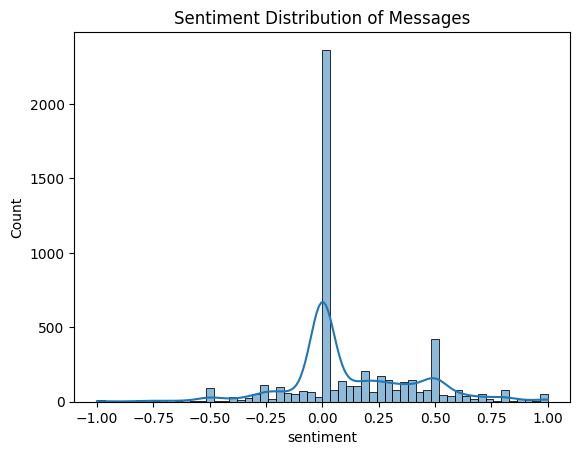

In [54]:
from textblob import TextBlob

# Add a sentiment column
data['sentiment'] = data['message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['sentiment'], kde=True)
plt.title('Sentiment Distribution of Messages')
plt.show()


Conclusion:
Bar charts and countplots are excellent for understanding categorical data distribution.
Word clouds are great for text data to visually show frequent terms.
Heatmaps and pairplots are good for relationships between numerical features.
Confusion matrix, ROC curve, and Sentiment analysis are useful to assess model performance and data insights.